In [1]:
import MCMC as MCSZ
import numpy as np
import corner
import matplotlib.pyplot as plt
import pandas as pd
import time
from astropy.io import fits
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
import sys
import csv

In [2]:
#Specify fiducial values (Should be same as from sim_script)

#Galaxy cluster parameters
y = 1.8e-5
electron_temperature = 5.0 #KeV
tau = MCSZ.y_to_tau(y,electron_temperature)
peculiar_vel = 0 #km/s
betac = peculiar_vel/(3e5)

#SIDES model values
amp_sides = 1
b_sides = 1

labels = ('y','temperature','betac','amp_sides','b_sides')
theta = (y, electron_temperature, betac, amp_sides, b_sides)

In [4]:
# Read simulation output, change directory 
df = pd.read_csv('/data/bolocam/bolocam/erapaport/mcmc_run_037',header=None) 
data = df.to_numpy()

In [5]:
np.shape(data)

(320001, 5)

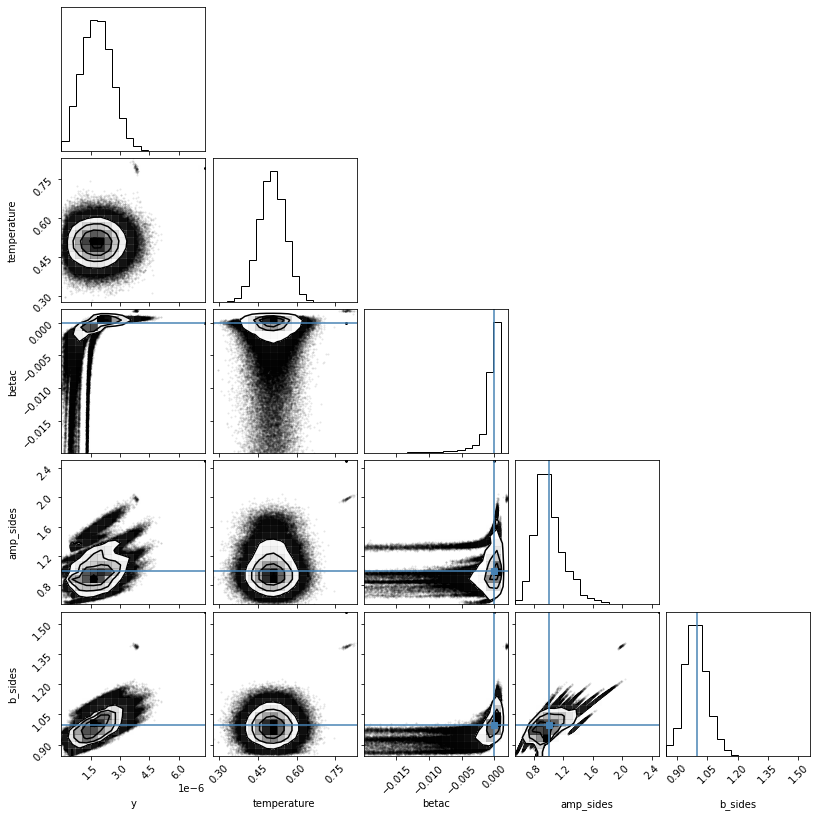

In [6]:
#Plot contour plot
fig = corner.corner(
    data[1:,:], labels=labels, truths=theta, smooth = 0
);

In [6]:
for i in range(31):
    print(i)
    print(np.mean(new_data[8000*(i)+1:8000*(i+1)+1,2]))

0


NameError: name 'new_data' is not defined

In [11]:
for i in range(20):
    print(i+20)
    print(np.mean(data[8000*(i+20)+1:8000*(i+20+1)+1,3]))

20
1.1740047643823228
21
0.6889968115230549
22
0.909497530085477
23
1.6390355700541481
24
0.9672725110402688
25
0.8386228754450064
26
1.0310141961194508
27
0.8293660591642646
28
0.9179101399837775
29
0.9186242324901753
30
1.2970718677386734
31
0.9844370280884341
32
0.9660882214498857
33
1.0320559706229784
34
1.0424664275979318
35
1.1369199618641037
36
1.288978910247237
37
0.9119344678141738
38
0.8073226013085839
39
0.8865441925700357


In [7]:
bad_indices = [0,4,9,13,21,23,30,35,36,32]
bad_indices = [0,3,7,10,17,18,24,28,28,23] #manual modification

In [8]:
new_data = data[1:,:]

In [9]:
np.shape(new_data)

(320000, 5)

In [10]:
for i in range(len(bad_indices)):
    new_data = np.concatenate((new_data[:8000*(bad_indices[i]),:],new_data[8000*((bad_indices[i])+1):,:]),axis=0)

In [11]:
np.shape(new_data)

(240000, 5)

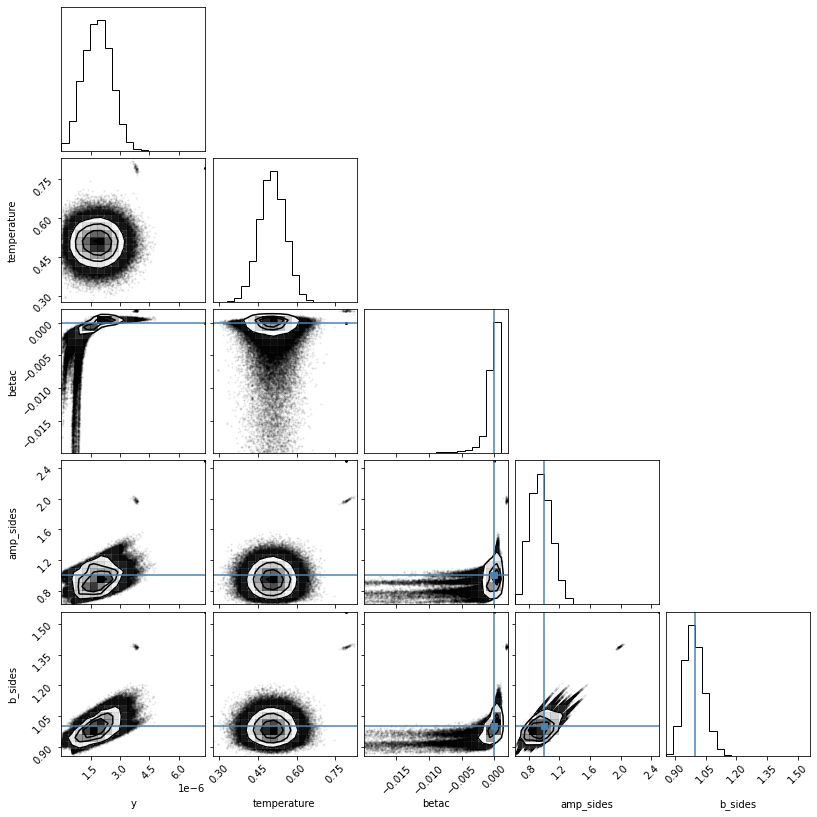

In [12]:
#Plot contour plot
fig = corner.corner(
    new_data[:,:], labels=labels, truths=theta, smooth = 0
);

In [13]:
np.std(new_data[:,2]*3e5)

601.6525916000664

In [14]:
np.std(new_data[:,0])

7.069331207797167e-07

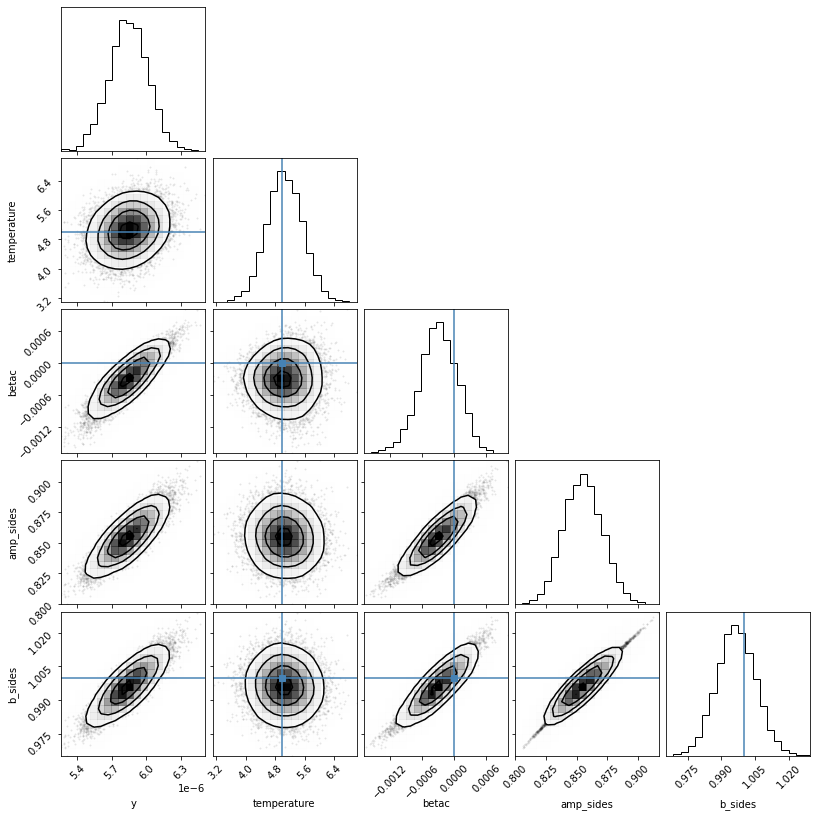

In [19]:
#Plot contour plot
i=15
fig = corner.corner(
    data[8000*i+1:8000*(i+1)+1,:], labels=labels, truths=theta, smooth = 1
);

In [6]:
np.std(data[:,2])*3e5

54.007983016739445

In [15]:
new_new_data = []
for i in range(len(new_data[:,2])):
    if new_data[i,2] > -0.005 and new_data[i,2] < 0.005:
        new_new_data.append(new_data[i,2])
new_new_data = np.asarray(new_new_data)
np.std(new_new_data)*3e5

265.95331634341915

In [15]:
np.std(new_new_data[:,2])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed